# [作業目標]
- 使用 Day 17 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 17 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = './data/'

### 之前做過的處理

In [65]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [66]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
app_train['EMPLOYED_yr']=app_train['DAYS_EMPLOYED']*(-1)/365
# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_train['AGE'] = app_train['DAYS_BIRTH']/365

In [68]:
sum(app_train['DAYS_EMPLOYED_ANOM'])

55374

## 練習時間
參考 Day 17 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [69]:
app_train["customized_age_grp"] = pd.cut(app_train['AGE'], [20, 30, 40, 50, 60, 70])
app_train['EMPLOYED_yr_grp'] = pd.cut(app_train['EMPLOYED_yr'], [0, 5, 10, 20, 30, 40, 50])

In [70]:
app_train["customized_age_grp"].value_counts()

(30, 40]    82308
(40, 50]    76541
(50, 60]    68062
(20, 30]    45021
(60, 70]    35579
Name: customized_age_grp, dtype: int64

In [71]:
app_train['EMPLOYED_yr_grp'].value_counts()

(0, 5]      136309
(5, 10]      64872
(10, 20]     38398
(20, 30]      9551
(30, 40]      2771
(40, 50]       234
Name: EMPLOYED_yr_grp, dtype: int64

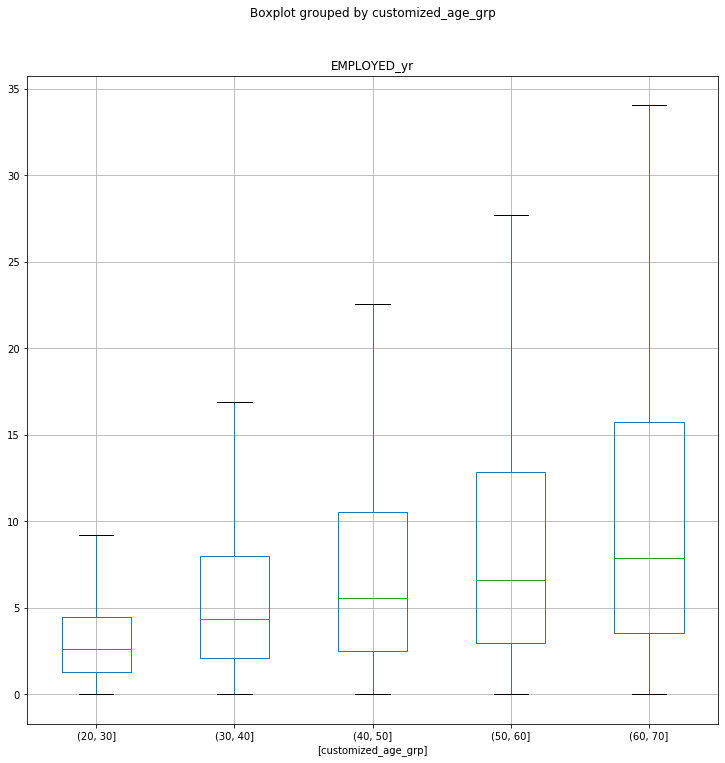

In [72]:
app_train.boxplot(['EMPLOYED_yr'], ['customized_age_grp'], showfliers = False, figsize=(12,12))

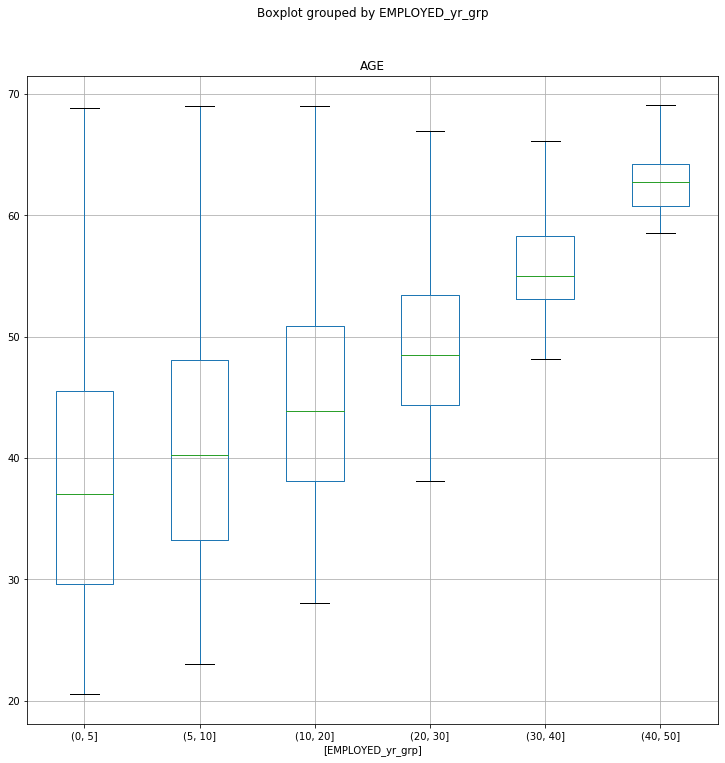

In [73]:
app_train.boxplot(['AGE'], ['EMPLOYED_yr_grp'], showfliers = False, figsize=(12,12))

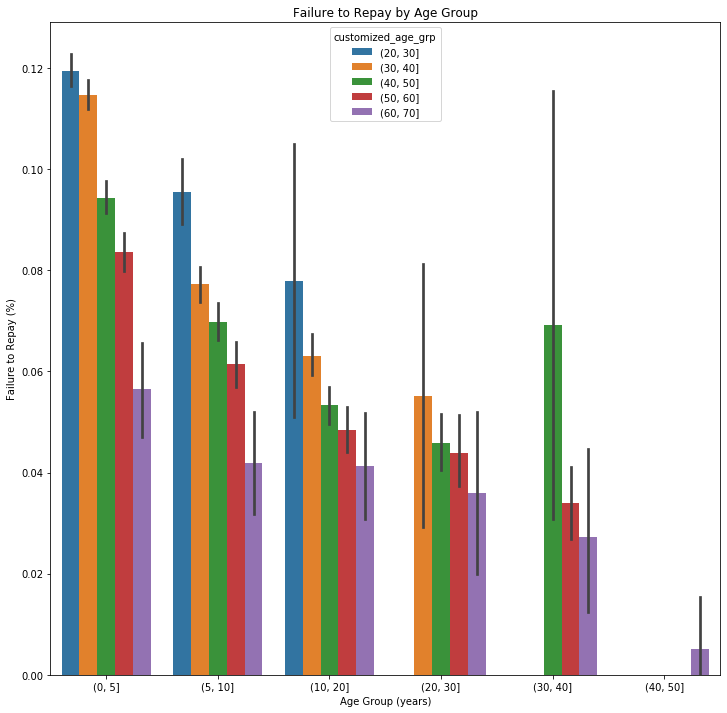

In [60]:
import seaborn as sns
plt.figure(figsize = (12, 12))
sns.barplot(app_train['EMPLOYED_yr_grp'], app_train['TARGET'], hue = app_train['customized_age_grp'], \
            orientation = 'vertical')
# Plot labeling
plt.xticks(); plt.xlabel('Employed Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay');

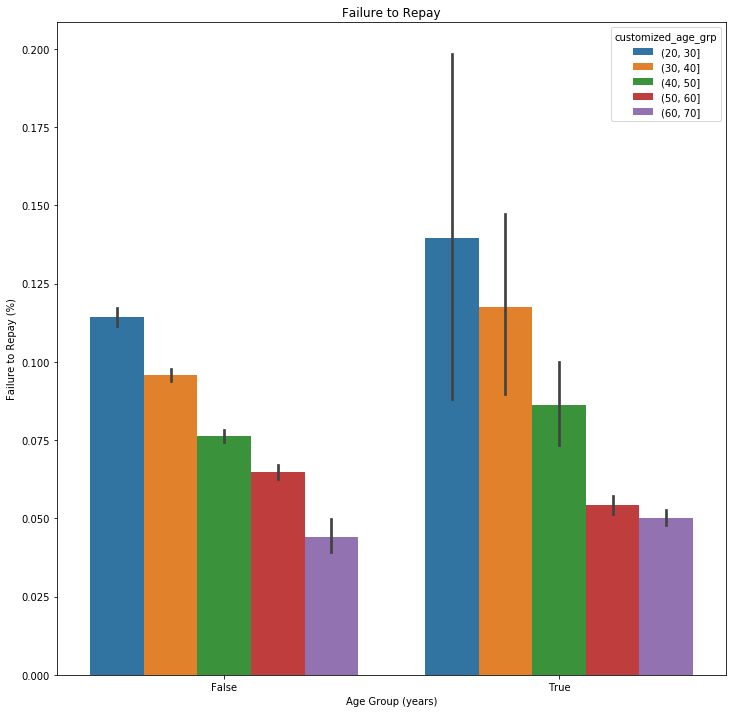

In [78]:
plt.figure(figsize = (12, 12))
sns.barplot(app_train['DAYS_EMPLOYED_ANOM'], app_train['TARGET'], hue = app_train['customized_age_grp'],\
            orientation = 'vertical')
plt.xticks(); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay');

In [86]:
g1 = app_train['customized_age_grp'].unique()[0]
app_train[(app_train['DAYS_EMPLOYED_ANOM']==True) & (app_train['customized_age_grp']==g1)]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED_ANOM,EMPLOYED_yr,AGE,customized_age_grp,EMPLOYED_yr_grp
1903,102231,0,0,M,0,1,0,62100.0,50940.0,5535.0,...,NaN,NaN,NaN,NaN,NaN,True,NaN,29.304110,"(20, 30]",NaN
3619,104225,0,0,M,0,1,0,99000.0,161730.0,14962.5,...,NaN,NaN,NaN,NaN,NaN,True,NaN,24.649315,"(20, 30]",NaN
5993,107017,0,0,M,0,1,0,382500.0,733315.5,39199.5,...,0.0,0.0,0.0,1.0,9.0,True,NaN,26.657534,"(20, 30]",NaN
6964,108111,0,0,F,0,1,1,134100.0,170640.0,11533.5,...,NaN,NaN,NaN,NaN,NaN,True,NaN,22.224658,"(20, 30]",NaN
7857,109161,0,0,M,0,0,0,144000.0,500211.0,30730.5,...,0.0,0.0,1.0,0.0,4.0,True,NaN,29.893151,"(20, 30]",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304297,452557,0,0,F,0,1,1,72000.0,239850.0,23850.0,...,NaN,NaN,NaN,NaN,NaN,True,NaN,24.745205,"(20, 30]",NaN
305020,453389,0,0,F,0,1,1,117000.0,284400.0,13833.0,...,0.0,0.0,0.0,0.0,4.0,True,NaN,26.427397,"(20, 30]",NaN
305365,453794,0,1,M,0,1,0,112500.0,900000.0,45000.0,...,0.0,0.0,0.0,0.0,0.0,True,NaN,28.947945,"(20, 30]",NaN
306265,454844,1,0,M,0,0,0,54000.0,273636.0,21748.5,...,0.0,0.0,0.0,0.0,0.0,True,NaN,28.460274,"(20, 30]",NaN


20-30歲且工作天數資料異常的族群違約比例較高，但因資料比數少，還不能下結論。